# **Credit Card Customer Segmentation Project 💳**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## **Introduction: Data Cleaning**

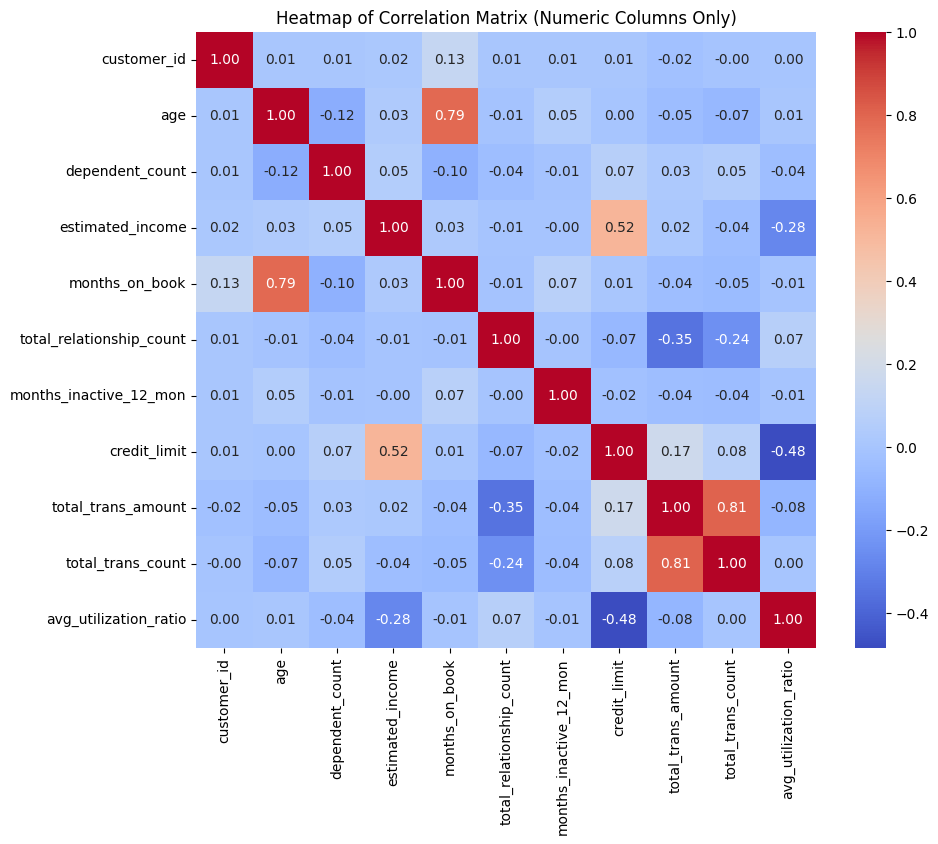

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

In [15]:
customer_segmentation=pd.read_csv("customer_segmentation.csv")

empty_data = customer_segmentation.isnull().sum()

numeric_df = customer_segmentation.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Heatmap of Correlation Matrix (Numeric Columns Only)')

# Show the plot
plt.show()

customer_segmentation.dtypes

In [16]:
customer_segmentation

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000


### **Conclusions:**

- There are **10127 rows and 14 columns** in the dataset including a unique identifier for each client, which is not going to be needed for the segmentation.

- Of the 13 columns left, there are 8 columns containing integers, 2 containing floats, and 3 columns containing strings, which means we have 3 categorical columns to deal with.

- Also, there are **no missing values.**

- Age is strongly correlated with how long the person has been a customer (months_on_book);

- Credit limit is positively correlated with the estimated income and negatively correlated with the average utilization ratio;

- The total number of transactions (total_trans_count) is strongly correlated with the total amount transitioned (total_trans_amount).

## **Feature Engineering**

### **Changing Replace 'M' with 1 and 'F' with '0'**

In [17]:
customers_modif=customer_segmentation.copy()
customers_modif['gender'] = customers_modif['gender'].replace({'M': 1, 'F': '0'})
customers_modif

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,1,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,0,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,1,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000


### **Replace the values in the 'education_level' column based on the mapping**

In [18]:
# Define the mapping of education levels to numeric values
education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}

# Replace the values in the 'education_level' column based on the mapping
customers_modif['education_level'] = customers_modif['education_level'].replace(education_mapping)
customers_modif

C:\Users\jruiz\AppData\Local\Temp\ipykernel_22060\2660084481.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers_modif['education_level'] = customers_modif['education_level'].replace(education_mapping)


,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,3,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,1,2,3,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,0,1,1,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,1,2,3,Unknown,47000,36,4,3,5281.0,8395,62,0.000


### **Create a dataframe containing dummy variables for the unique values in the marital_status**

In [19]:
# Apply get_dummies to only the 'education_level' column
dummy_education = pd.get_dummies(customers_modif['marital_status'], drop_first=True)

# Concatenate the dummy variables with the original DataFrame (dropping the original 'education_level' column)
customers_modif = pd.concat([customers_modif.drop(columns=['marital_status']), dummy_education], axis=1)
customers_modif

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Married,Single,Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,3,51000,40,3,2,4003.0,15476,117,0.462,False,True,False
10123,710638233,41,1,2,3,40000,25,4,2,4277.0,8764,69,0.511,False,False,False
10124,716506083,44,0,1,1,33000,36,5,3,5409.0,10291,60,0.000,True,False,False
10125,717406983,30,1,2,3,47000,36,4,3,5281.0,8395,62,0.000,False,False,True


## **Scaling the Data ⬇️**

In [20]:
customers=customers_modif.drop("customer_id",axis=1)
customers

scaler = StandardScaler()
scaler.fit(customers)
df_scaled = scaler.transform(customers)
df_scaled

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])

## **Choosing K**

In [21]:
def plot_elbow_curve(df, max_clusters=10):
    inertias = []

    for k in range(1, max_clusters+1):
        model = KMeans(n_clusters=k)
        cluster = model.fit_predict(df)
        inertias.append(model.inertia_)
        
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, max_clusters+1), inertias, marker='o')
    plt.xticks(ticks=range(1, max_clusters+1), labels=range(1, max_clusters+1))
    plt.title('Inertia vs Number of Clusters')

    plt.tight_layout()
    plt.show()
    
    return inertias

#plot_elbow_curve(df_scaled,max_clusters=10)


# We will use 5 clusters
model = KMeans(n_clusters=6)
cluster = model.fit_predict(df_scaled)
cluster



array([5, 3, 5, ..., 1, 4, 1], dtype=int32)

## **Analyzing Results 🔬**

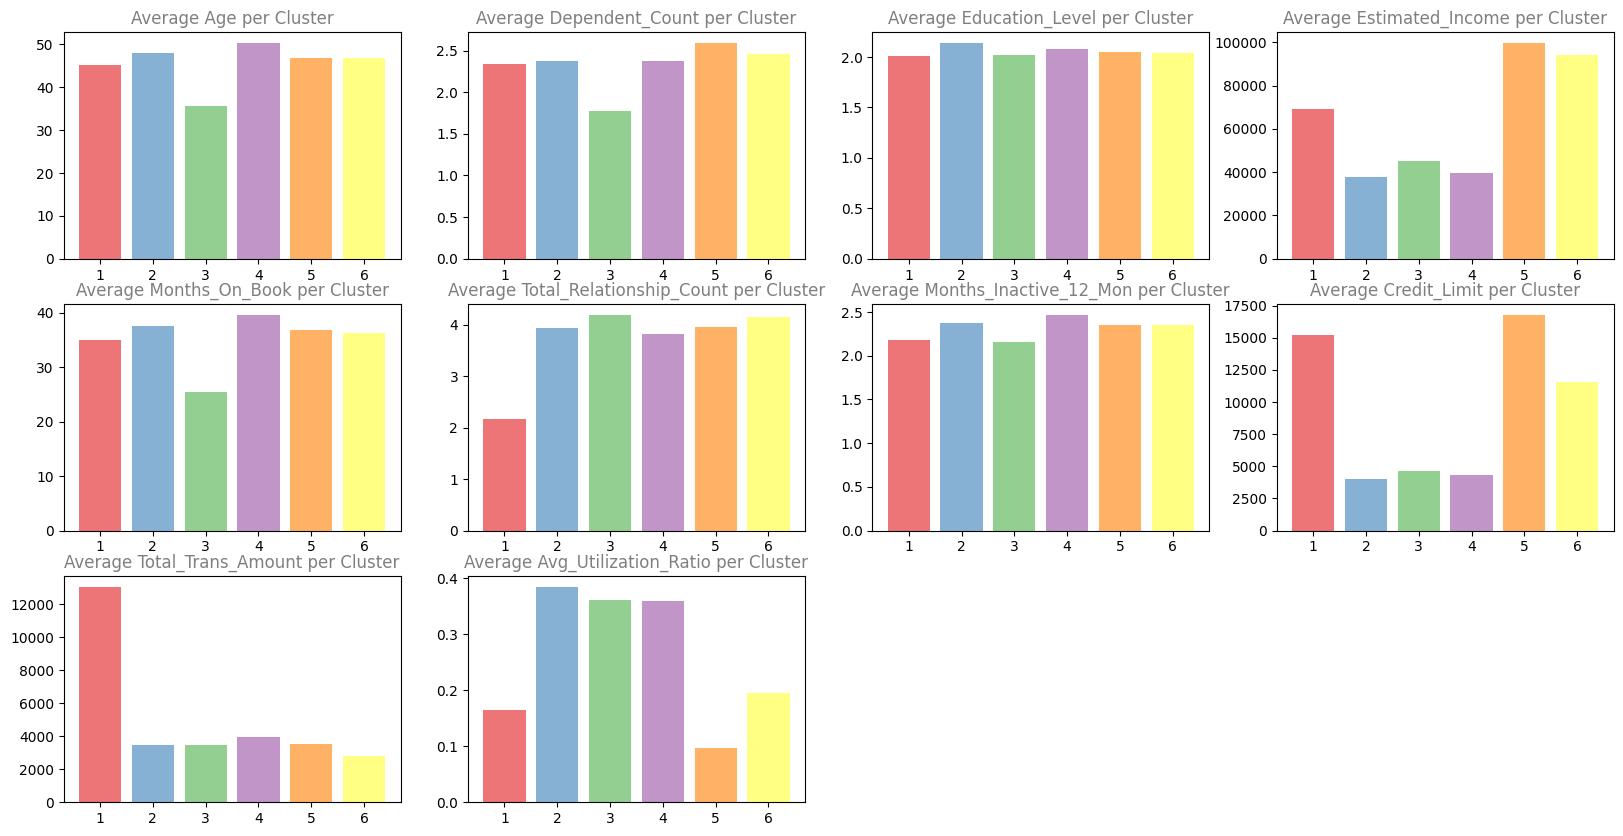

In [22]:
customers["CLUSTER"] = cluster + 1


numeric_columns = ["age","dependent_count","education_level","estimated_income","months_on_book","total_relationship_count","months_inactive_12_mon","credit_limit","total_trans_amount","avg_utilization_ratio"]

fig = plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_columns):
    df_plot = customers.groupby('CLUSTER')[column].mean()    
    ax = fig.add_subplot(3, 4, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)



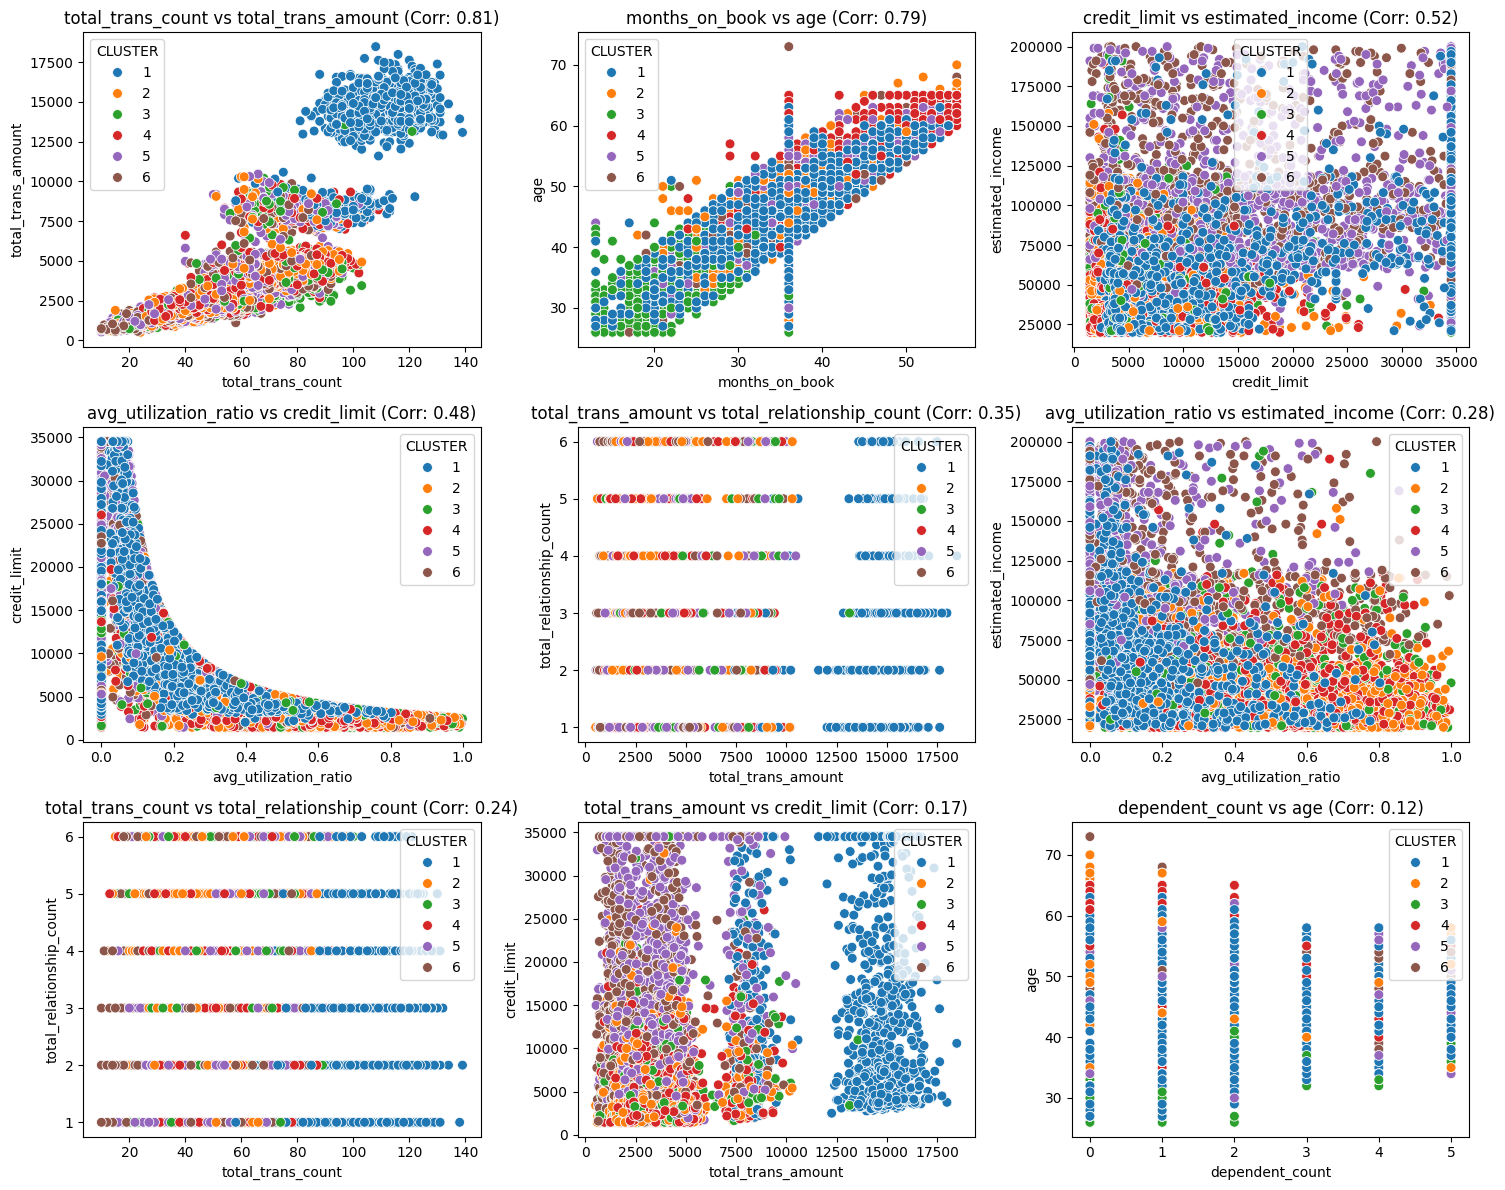

In [23]:
def find_most_correlated(n):
    numeric_df2=numeric_df.drop("customer_id",axis=1)
    corr_matrix = numeric_df2.corr()

    # Masking the diagonal
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Flattening the matrix to find correlations between pairs
    corr_pairs = corr_matrix.where(~mask).stack()
    corr_pairs=abs(corr_pairs)
    # Sorting the correlations in descending order
    sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

    # Display the top N most correlated pairs
    top_corr_pairs = sorted_corr_pairs.head(n)

    # Display the top pairs and their correlation values
    return top_corr_pairs


plt.figure(figsize=(15, 12))  # Adjust the size if needed

for i, ((col1, col2), corr_value) in enumerate(find_most_correlated(9).items()):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid (adjust if needed)
    sns.scatterplot(x=col1, y=col2, hue='CLUSTER', palette='tab10', data=customers, s=50)
    plt.title(f"{col1} vs {col2} (Corr: {corr_value:.2f})")
    plt.xlabel(col1)
    plt.ylabel(col2)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**We can draw some early conclusions considering only the numeric variables.**

For instance, Cluster 1 has the highest amount of money transitioned, while Cluster 2 has the lowest credit limit and estimated income and the highest utilization rate. Cluster 4 has the highest credit limit. Older clients are grouped in Cluster 5.

For the categorical columns, we'll plot the percentual distribution of each variable in each cluster. This will allow us to verify if a particular cluster is mostly composed of men, or of married people only, for example.

In [24]:
find_most_correlated(9)

total_trans_count      total_trans_amount          0.807192
months_on_book         age                         0.788912
credit_limit           estimated_income            0.515863
avg_utilization_ratio  credit_limit                0.482965
total_trans_amount     total_relationship_count    0.347229
avg_utilization_ratio  estimated_income            0.277532
total_trans_count      total_relationship_count    0.241891
total_trans_amount     credit_limit                0.171730
dependent_count        age                         0.122254
dtype: float64

C:\Users\jruiz\AppData\Local\Temp\ipykernel_22060\649739987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\jruiz\AppData\Local\Temp\ipykernel_22060\649739987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\jruiz\AppData\Local\Temp\ipykernel_22060\649739987.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


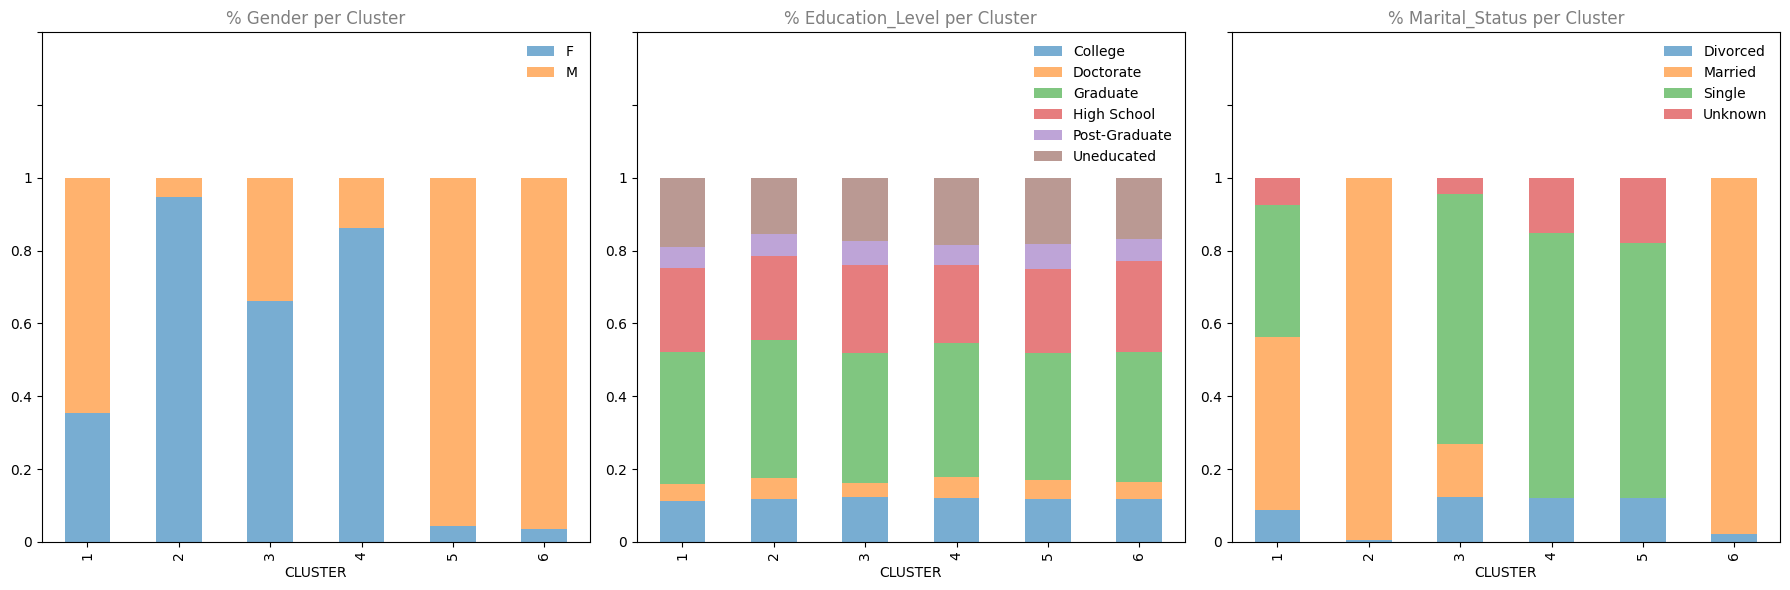

In [25]:

customer_segmentation["CLUSTER"]=cluster + 1
cat_columns = ["gender","education_level","marital_status"]
cat_columns
fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=customer_segmentation['CLUSTER'], columns=customer_segmentation[col], values=customer_segmentation[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()


**Considering the categorical variables, we notice that the education level is well divided between clusters.**

## **Conclusion**
As demanded by the company, we now have listed the most important characteristics of each cluster. We could also some suggestions and insights into each one of them.

In the end, we have the list of customers with a cluster assigned to each one.

### **Cluster 1**
Characteristics: Balanced Gender; high credit limit; high amount transitioned; high number of transactions; low utilization rate.

Insight: People with high volume spent on the card, but do not use it on a daily basis. Could be incentivised to spend more.

### **Cluster 2**
Characteristics: Mostly women; mostly married; low estimated income; low credit limit; low amount transitioned; high utilization rate.

Insight: Married people (majority women) with low income and limit but utilize too much of their credit with a few larger purchases

### **Cluster 3**
Cluster 3: Gender well divided; low credit limit, high utilization rate; marital status mostly single; smaller cluster.

Insight: Men and women with low credit limits but do have high balances.

### **Cluster 4**
Cluster 4: Mostly female, mostly single and married, high estimated income, high credit limit; low amount transitioned; high utilization rate.

Insight: People (majority female) with high income and credit limits, but don't use the card for high amount transactions. Could be incentivized to spend more.

### **Cluster 5**
Cluster 5: Mostly single, high age, low dependent count, long time customers, high credit limit, low amount transitioned, low utilization rate.

Insight: Older people and long-time customers.

### **Cluster 6**
Cluster 6: Mostly men; close to 100% married people, high estimated income, high credit limit, low amount transitioned, high utilization rate.

Insight: Single (mostly men) people that dont use their card a lot but have high credit limits and income. Could reduce the credit limit.

In [29]:
# List of customers and clusters
customer_segmentation[['customer_id', 'CLUSTER']]

,customer_id,CLUSTER
0,768805383,6
1,818770008,4
2,713982108,6
3,769911858,4
4,709106358,6
...,...,...
10122,772366833,1
10123,710638233,3
10124,716506083,2
10125,717406983,5
